In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
import seaborn as sns
from toolbox import plot_tools

sns.set_style('ticks')
halpha_palette = sns.light_palette('goldenrod', 5)
f275w_palette = sns.light_palette('mediumvioletred', 5)
f606w_palette = sns.light_palette('indigo', 5)

age_cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=1)

halpha_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
f275w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_bagpipes_input.fits')
f606w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_bagpipes_input.fits')

output_halpha = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_bagpipes_results.fits')
output_f275w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_dexp_logprior_single_bagpipes_results.fits')
output_f606w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_dexp_logprior_single_bagpipes_results.fits')

output_halpha_unresolved = output_halpha[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1)) & (~halpha_input['resolved_flag'])]
output_f275w_unresolved = output_f275w[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] == 1)) & (~f275w_input['resolved_flag'])]
output_f606w_unresolved = output_f606w[f606w_input['resolved_flag'] == False]

output_halpha = output_halpha[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1)) & (halpha_input['resolved_flag'])]
output_f275w = output_f275w[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] == 1)) & (f275w_input['resolved_flag'])]

flag_606 = (f606w_input['resolved_flag'] == True)
output_f606w = output_f606w[flag_606]

halpha_input_unresolved = halpha_input[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1)) & (~halpha_input['resolved_flag'])]
f275w_input_unresolved = f275w_input[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] == 1)) & (~f275w_input['resolved_flag'])]
f606w_input_unresolved = f606w_input[f606w_input['resolved_flag'] == False]

halpha_input = halpha_input[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1)) & (halpha_input['resolved_flag'])]
f275w_input = f275w_input[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] == 1)) & (f275w_input['resolved_flag'])]
f606w_input = f606w_input[flag_606]

halpha_input = halpha_input[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]
output_halpha = output_halpha[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]

f275w_input = f275w_input[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]
output_f275w = output_f275w[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]

f606w_input = f606w_input[~output_f606w['bad_fit']]
output_f606w = output_f606w[~output_f606w['bad_fit']]

print(len(output_halpha), len(output_f275w), len(output_f606w))

for galaxy in np.unique(output_halpha['galaxy']):
    print(galaxy, (output_halpha['galaxy']==galaxy).sum(), (output_f275w['galaxy']==galaxy).sum(), (output_f606w['galaxy']==galaxy).sum())

46 142 157
JO175 1 7 11
JO201 14 65 49
JO204 4 14 24
JO206 17 33 29
JW100 8 19 22
JW39 2 4 22


/home/ariel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(


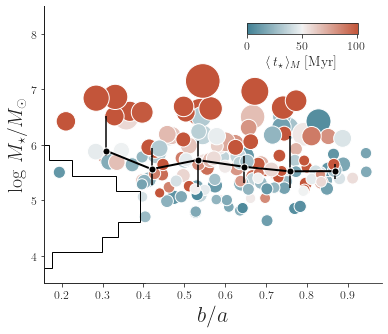

In [2]:
fig = plt.figure(figsize=(5.5, 4.75))

max_age = np.percentile(1e3 * output_f606w['mwage'], 80)

scatter = plt.scatter(f606w_input['axial_ratio'], output_f606w['stellar_mass'], c=1e3 * output_f606w['mwage'],
                      edgecolors='w', vmin=0, vmax=max_age, cmap=age_cmap,
                      s=1200*f606w_input['r_core_corr']/np.max(f606w_input['r_core_corr']))
plot_tools.plot_median_in_bins(f606w_input['axial_ratio'], output_f606w['stellar_mass'], nbins=6,
                               percentile_style='errorbar', color='k', percentiles_color='k', point_edgewidths=1,
                               point_edgecolors='w', point_size=50)
ax = plt.gca()
inset_ax = ax.inset_axes([0, 0, 0.3, 1])
inset_ax.set_xticklabels([])
inset_ax.set_yticklabels([])
inset_ax.spines["top"].set_visible(False)
inset_ax.spines["right"].set_visible(False)
inset_ax.patch.set_alpha(0)
inset_ax.tick_params(axis='both', length=0)
inset_ax.set_ylim(3.5, 8)

inset_ax.hist(output_f606w_unresolved['stellar_mass'], orientation='horizontal',
              bins=np.arange(3.5, 8.5, 0.25), histtype='step', color='k', density=True)
# ax.set_ylim(-2.05, 0.32)


plt.xlabel(r'$b/a$', fontsize=22)
plt.ylabel(r'$\log\,M_\star/M_\odot$', fontsize=20)

plt.ylim(3.5, 8.5)

cb_ax = plt.gca().inset_axes([0.6, 0.9, 0.33, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=scatter)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
cb_ax.tick_params(labelsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

fig.tight_layout()

plt.savefig('mass_axratio_color.pdf')
plt.savefig('mass_axratio_color.jpg', dpi=300)

/home/ariel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(


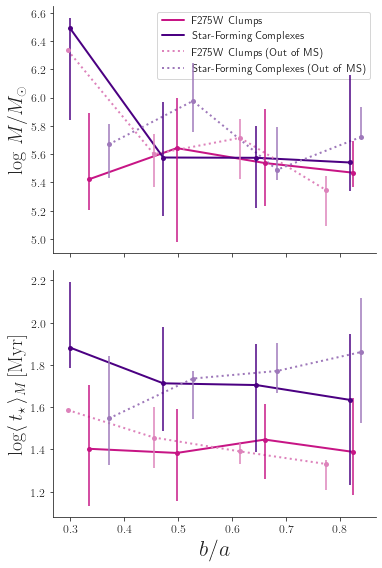

In [2]:
sf_flag_halpha = np.log10(output_halpha['sfr']) > 0.70 * output_halpha['stellar_mass'] - 7.25
sf_flag_f275w = np.log10(output_f275w['sfr']) > 0.70 * output_f275w['stellar_mass'] - 7.25
sf_flag_f606w = np.log10(output_f606w['sfr']) > 0.70 * output_f606w['stellar_mass'] - 7.25


fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), sharex=True)


# ax[0].scatter(f275w_input['axial_ratio'],
#               output_f275w['stellar_mass'], color=f275w_palette[1],
#               edgecolors='white', 
#               s=30)

# ax[0].scatter(f606w_input['axial_ratio'],
#               output_f606w['stellar_mass'], color=f606w_palette[1],
#               edgecolors='white', 
#               s=30)

# ax[1].scatter(f275w_input['axial_ratio'],
#               np.log10(1e3 * output_f275w['mwage']), color=f275w_palette[1],
#               edgecolors='white', 
#               s=30)

# ax[1].scatter(f606w_input['axial_ratio'],
#               np.log10(1e3 * output_f606w['mwage']), color=f606w_palette[1],
#               label=r'Star-Forming Complexes', edgecolors='white', 
#               s=30)


plot_tools.plot_median_in_bins(f275w_input['axial_ratio'][sf_flag_f275w],
                               output_f275w['stellar_mass'][sf_flag_f275w], color=f275w_palette[4], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f275w_palette[4], label=r'F275W Clumps')

plot_tools.plot_median_in_bins(f606w_input['axial_ratio'][sf_flag_f606w],
                               output_f606w['stellar_mass'][sf_flag_f606w], color=f606w_palette[4], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f606w_palette[4], label=r'Star-Forming Complexes')

plot_tools.plot_median_in_bins(f275w_input['axial_ratio'][sf_flag_f275w],
                               np.log10(1e3 * output_f275w['mwage'])[sf_flag_f275w], color=f275w_palette[4], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f275w_palette[4])


plot_tools.plot_median_in_bins(f606w_input['axial_ratio'][sf_flag_f606w],
                               np.log10(1e3 * output_f606w['mwage'])[sf_flag_f606w], color=f606w_palette[4], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f606w_palette[4])



plot_tools.plot_median_in_bins(f275w_input['axial_ratio'][~sf_flag_f275w],
                               output_f275w['stellar_mass'][~sf_flag_f275w], color=f275w_palette[2], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f275w_palette[2], label=r'F275W Clumps (Out of MS)', median_ls='dotted')

plot_tools.plot_median_in_bins(f606w_input['axial_ratio'][~sf_flag_f606w],
                               output_f606w['stellar_mass'][~sf_flag_f606w], color=f606w_palette[2], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f606w_palette[2], label=r'Star-Forming Complexes (Out of MS)', median_ls='dotted')

plot_tools.plot_median_in_bins(f275w_input['axial_ratio'][~sf_flag_f275w],
                               np.log10(1e3 * output_f275w['mwage'])[~sf_flag_f275w], color=f275w_palette[2], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f275w_palette[2], median_ls='dotted')

plot_tools.plot_median_in_bins(f606w_input['axial_ratio'][~sf_flag_f606w],
                               np.log10(1e3 * output_f606w['mwage'])[~sf_flag_f606w], color=f606w_palette[2], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=4,
                               percentiles_color=f606w_palette[2], median_ls='dotted')



plt.xlabel(r'$b/a$', fontsize=22)
ax[1].set_ylabel(r'$\log \langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=20)
ax[0].set_ylabel(r'$\log\,M/M_\odot$', fontsize=20)

ax[0].legend(frameon=True, fontsize=11, loc=1, framealpha=0.8)

ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)

sns.despine()

plt.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

plt.savefig('axratio-clumps_diff.pdf')
plt.savefig('axratio-clumps_diff.jpg', dpi=300)

In [7]:
np.mean(np.log10(output_f606w['sfr'])[~sf_flag_f606w])

-14.746734872186419

/home/ariel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(


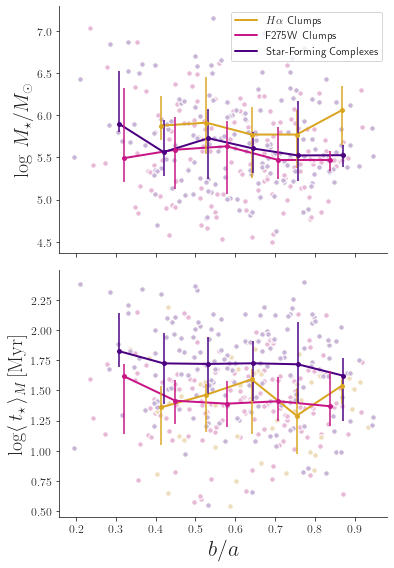

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), sharex=True)


ax[0].scatter(f275w_input['axial_ratio'],
              output_f275w['stellar_mass'], color=f275w_palette[1],
              edgecolors='white', 
              s=30)

ax[0].scatter(f606w_input['axial_ratio'],
              output_f606w['stellar_mass'], color=f606w_palette[1],
              edgecolors='white', 
              s=30)

ax[1].scatter(f275w_input['axial_ratio'],
              np.log10(1e3 * output_f275w['mwage']), color=f275w_palette[1],
              edgecolors='white', 
              s=30)

ax[1].scatter(halpha_input['axial_ratio'],
              np.log10(1e3 * output_halpha['mwage']), color=halpha_palette[1],
              edgecolors='white', 
              s=30)

ax[1].scatter(f606w_input['axial_ratio'],
              np.log10(1e3 * output_f606w['mwage']), color=f606w_palette[1],
              label=r'Star-Forming Complexes', edgecolors='white', 
              s=30)


plot_tools.plot_median_in_bins(halpha_input['axial_ratio'],
                               output_halpha['stellar_mass'], color=halpha_palette[4], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=5,
                               percentiles_color=halpha_palette[4], label=r'$H\alpha$ Clumps')

plot_tools.plot_median_in_bins(f275w_input['axial_ratio'],
                               output_f275w['stellar_mass'], color=f275w_palette[4], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=5,
                               percentiles_color=f275w_palette[4], label=r'F275W Clumps')

plot_tools.plot_median_in_bins(f606w_input['axial_ratio'],
                               output_f606w['stellar_mass'], color=f606w_palette[4], ax=ax[0],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f606w_palette[4], label=r'Star-Forming Complexes')


plot_tools.plot_median_in_bins(halpha_input['axial_ratio'],
                               np.log10(1e3 * output_halpha['mwage']), color=halpha_palette[4], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=5,
                               percentiles_color=halpha_palette[4])

plot_tools.plot_median_in_bins(f275w_input['axial_ratio'],
                               np.log10(1e3 * output_f275w['mwage']), color=f275w_palette[4], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=5,
                               percentiles_color=f275w_palette[4])


plot_tools.plot_median_in_bins(f606w_input['axial_ratio'],
                               np.log10(1e3 * output_f606w['mwage']), color=f606w_palette[4], ax=ax[1],
                               percentile_style='errorbar', point_edgecolors='w', nbins=6,
                               percentiles_color=f606w_palette[4])


plt.xlabel(r'$b/a$', fontsize=22)
ax[1].set_ylabel(r'$\log \langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=20)
ax[0].set_ylabel(r'$\log\,M_\star/M_\odot$', fontsize=20)

ax[0].legend(frameon=True, fontsize=11, loc=1, framealpha=0.8)

ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)

sns.despine()

plt.tick_params(axis='both', labelsize=12)

fig.tight_layout()
fig.subplots_adjust(hspace=0.07)

plt.savefig('axratio-clumps.pdf')
plt.savefig('axratio-clumps.jpg', dpi=300)

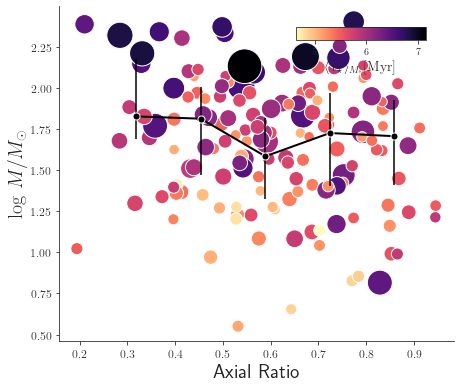

In [5]:
fig = plt.figure(figsize=(6.5, 5.5))

scatter = plt.scatter(f606w_input['axial_ratio'], np.log10(1e3 * output_f606w['mwage']), c=output_f606w['stellar_mass'],
                      edgecolors='w', cmap='magma_r',
                      s=1200*f606w_input['r_core_corr']/np.max(f606w_input['r_core_corr']))
plot_tools.plot_median_in_bins(f606w_input['axial_ratio'], np.log10(1e3 * output_f606w['mwage']), nbins=5,
                               percentile_style='errorbar', color='k', percentiles_color='k', point_edgewidths=1,
                               point_edgecolors='w', point_size=50)

plt.xlabel(r'Axial Ratio', fontsize=20)
plt.ylabel(r'$\log\,M/M_\odot$', fontsize=20)

cb_ax = plt.gca().inset_axes([0.6, 0.9, 0.33, 0.04])
cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=scatter)
cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

fig.tight_layout()



In [7]:
np.corrcoef([f606w_input['axial_ratio'], np.log10(1e3 * output_f606w['mwage']), output_f606w['stellar_mass']], [f606w_input['axial_ratio'], np.log10(1e3 * output_f606w['mwage']), output_f606w['stellar_mass']])

array([[ 1.        , -0.15878607, -0.14293127,  1.        , -0.15878607,
        -0.14293127],
       [-0.15878607,  1.        ,  0.49494718, -0.15878607,  1.        ,
         0.49494718],
       [-0.14293127,  0.49494718,  1.        , -0.14293127,  0.49494718,
         1.        ],
       [ 1.        , -0.15878607, -0.14293127,  1.        , -0.15878607,
        -0.14293127],
       [-0.15878607,  1.        ,  0.49494718, -0.15878607,  1.        ,
         0.49494718],
       [-0.14293127,  0.49494718,  1.        , -0.14293127,  0.49494718,
         1.        ]])

In [13]:
print(pearsonr(halpha_input['axial_ratio'], output_halpha['stellar_mass']))
print(pearsonr(f275w_input['axial_ratio'], output_f275w['stellar_mass']))
print(pearsonr(f606w_input['axial_ratio'], output_f606w['stellar_mass']))

(0.036868917080836366, 0.8078054643838694)
(-0.11643285122729465, 0.16761980997260323)
(-0.14293127041132894, 0.07413282769333145)


In [15]:
print(pearsonr(halpha_input['axial_ratio'], np.log10(1e3 * output_halpha['mwage'])))
print(pearsonr(f275w_input['axial_ratio'], np.log10(1e3 * output_f275w['mwage'])))
print(pearsonr(f606w_input['axial_ratio'], np.log10(1e3 * output_f606w['mwage'])))

(-0.05015894316205944, 0.7406137849087389)
(0.01501805705780529, 0.8592028252300605)
(-0.15878606719851754, 0.04699946767007782)
